<a href="https://colab.research.google.com/github/sandeshrajbhandari/py-notebooks/blob/main/Copy_of_sdxl_finetune_dreambooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Manual Dreambooth



In [ ]:
# !pip install -U autotrain-advanced

# !autotrain setup --update-torch

In [ ]:
!wget https://github.com/huggingface/diffusers/raw/main/examples/dreambooth/requirements.txt

--2023-07-30 11:44:07--  https://github.com/huggingface/diffusers/raw/main/examples/dreambooth/requirements.txt
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/requirements.txt [following]
--2023-07-30 11:44:07--  https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]      76  --.-KB/s    in 0s      

2023-07-30 11:44:08 (4.65 MB/s) - ‘requirements.txt’ saved [76/76]


In [ ]:
!pip install bitsandbytes xformers invisible-watermark>=0.2.0
!pip install git+https://github.com/huggingface/diffusers
!pip install -U -r requirements.txt

In [ ]:
!accelerate config default

2023-07-30 11:45:07.350205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
!cp /content/drive/MyDrive/AI/train_dreambooth_lora_sdxl.py /content/train_dreambooth_lora_sdxl.py

In [ ]:
!wget https://github.com/huggingface/diffusers/raw/main/examples/dreambooth/train_dreambooth_lora_sdxl.py

--2023-07-29 11:40:56--  https://github.com/huggingface/diffusers/raw/main/examples/dreambooth/train_dreambooth_lora_sdxl.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py [following]
--2023-07-29 11:40:56--  https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57081 (56K) [text/plain]
Saving to: ‘train_dreambooth_lora_sdxl.py’

train_dreambooth_lo 100%[===================>]  55.74K  --.-KB/s    in 0.01s   

2023-0

In [ ]:
## I UPLOADED 5 PHOTOS OF IRFAN KHAN IN /content/irfan folder. or default home folder in colab.
## dataset - https://cdn-150.zippysha.re/03S7c45dz6/917d1e3d-1690644955/irfan-dreambooth-4.zip
## https://zippysha.re/03S7c45dz6/irfan_dreambooth_4_zip
## link expires after 30 days of no activity.

In [ ]:
!rmdir /content/irfan/.ipynb_checkpoints

In [ ]:
%%time
!accelerate launch --mixed_precision="fp16"  train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --instance_data_dir="/content/tomh" \
  --instance_prompt="a photo of tmh person" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=150 \
  --learning_rate=1e-04 \
  --output_dir="/content/output" \
  --use_8bit_adam \
  --enable_xformers_memory_efficient_attention \
  --checkpointing_steps=2000
  # --lr_scheduler="cosine"

2023-07-30 12:41:43.194717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-30 12:41:49.859956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
07/30/2023 12:41:53 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'clip_sample_range', 'thresholding', 'dynamic_thresholding_ratio', 'variance_type'} was not found in config. Values will be initialized to default values.


## Check the LORA model

In [ ]:
!cp /content/output/pytorch_lora_weights.bin /content/drive/MyDrive/AI/pytorch_lora_weights-ga-4-512-150-emptyfolder.bin

In [ ]:
!cp /content/train_dreambooth_lora_sdxl.py /content/drive/MyDrive/AI/train_dreambooth_lora_sdxl.py

In [ ]:
from huggingface_hub.repocard import RepoCard
from diffusers import DiffusionPipeline
import torch

# lora_model_id = "/content/output/pytorch_lora_weights.bin"

lora_model_id = "/content/output/pytorch_lora_weights-250-tmh.bin"
# card = RepoCard.load(lora_model_id)
# base_model_id = card.data.to_dict()["base_model"]
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipe.load_lora_weights(lora_model_id, weight_name="")
## probably adds the weight name to the folder path of LORA, so just pass the lora_model directory

In [ ]:
pipe??

  0%|          | 0/25 [00:00<?, ?it/s]

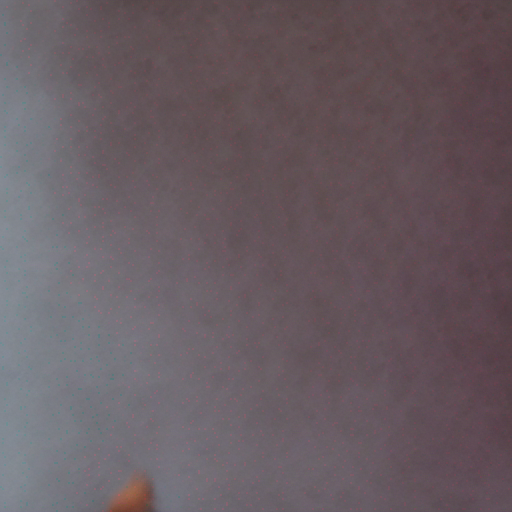

In [ ]:
# pipe.load_lora_weights(lora_model_id)
# pipe.unet.load_attn_procs(lora_model_id)
pipe = pipe.to("cuda")
image = pipe("a digital painting of tmh person", num_inference_steps=25, height=512, width=512).images[0]
image ## 250 STEPS ga - 4.

  0%|          | 0/20 [00:00<?, ?it/s]

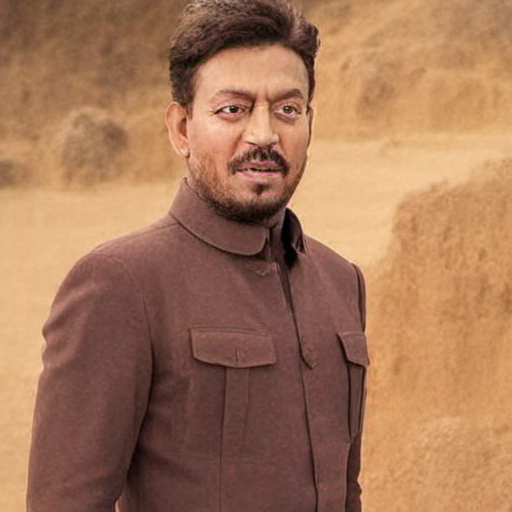

In [ ]:
# pipe.load_lora_weights(lora_model_id)
# pipe.unet.load_attn_procs(lora_model_id)
pipe = pipe.to("cuda")
image = pipe("a photo of irfn person", num_inference_steps=20, height=512, width=512).images[0]
image ## 150 STEPS ga - 4.

  0%|          | 0/20 [00:00<?, ?it/s]

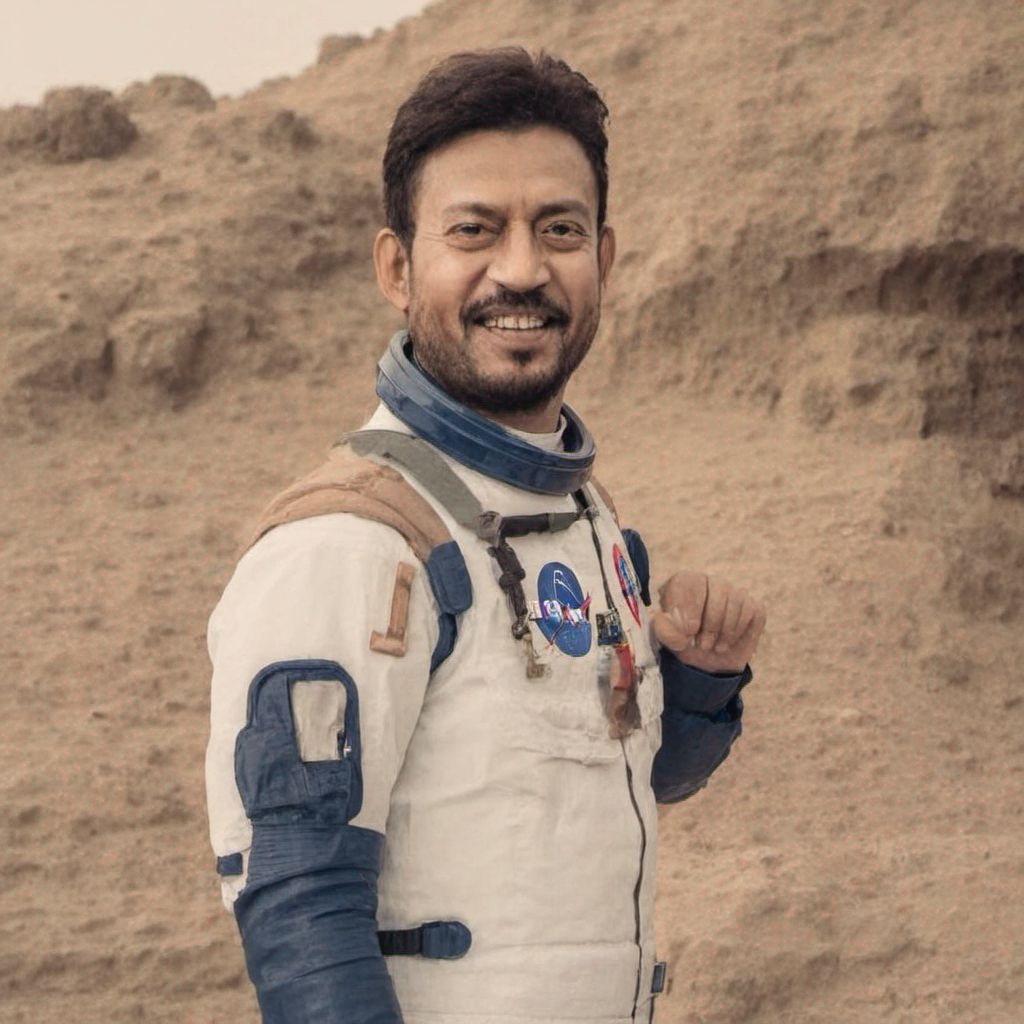

In [ ]:
image = pipe("A photo of irfn person as an astronaut", num_inference_steps=20, height=1024, width=1024).images[0]
image

  0%|          | 0/20 [00:00<?, ?it/s]

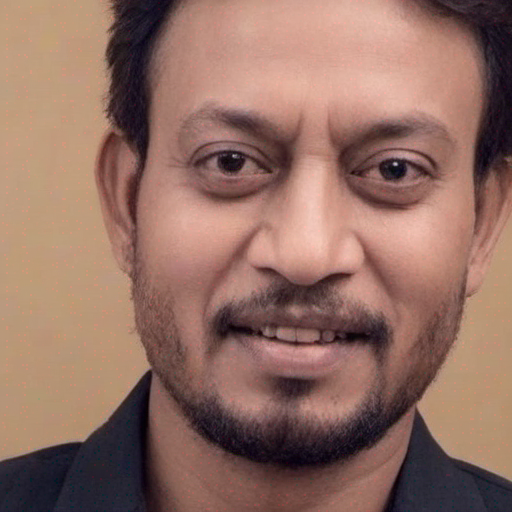

In [ ]:
# pipe.load_lora_weights(lora_model_id)
# pipe.unet.load_attn_procs(lora_model_id)
pipe = pipe.to("cuda")
image = pipe("A portrait photo of irfn person", num_inference_steps=20, height=512, width=512).images[0]
image ## 50 step version ouput

  0%|          | 0/20 [00:00<?, ?it/s]

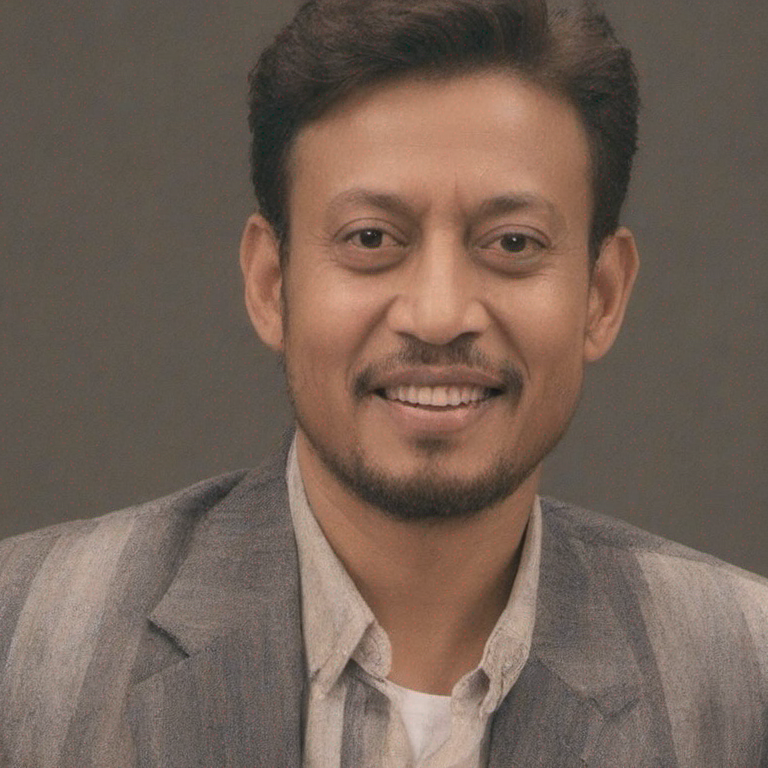

In [ ]:
image = pipe("A photo of irfn person, crisp, 4k", num_inference_steps=20, height=768, width=768).images[0]
image

In [ ]:
pipe = 0


In [ ]:
torch.cuda.empty_cache()

  0%|          | 0/20 [00:00<?, ?it/s]

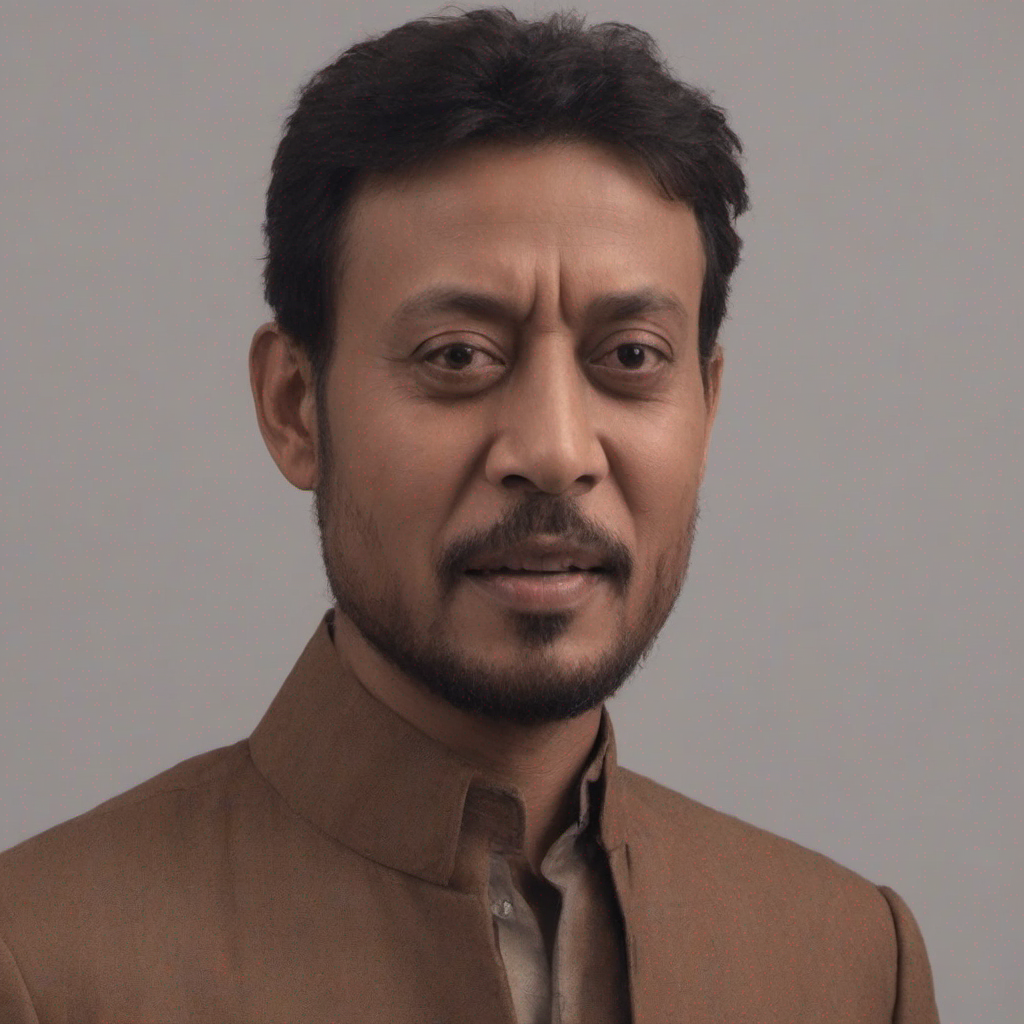

In [ ]:
image = pipe("A photo of irfn person, 4k, detailed", num_inference_steps=20, height=1024, width=1024).images[0]
image

In [ ]:

prompt = "a photo of nrsh man, fullframe, 50mm"

for seed in range(1):
  generator = torch.Generator("cuda").manual_seed(seed)
  images = pipe(prompt=prompt, generator=generator, num_inference_steps=20)
images[0]

## Autotrain Way

In [ ]:
!pip install -U autotrain-advanced

!autotrain setup --update-torch

In [ ]:
!autotrain dreambooth \
--model stabilityai/stable-diffusion-xl-base-1.0 \
--output output/ \
--image-path /content/naresh \
--prompt "photo of nrsh man" \
--resolution 512 \
--batch-size 1 \
--num-steps 500 \
--fp16 \
--gradient-accumulation 4 \
--lr 1e-4 \
--use-8bit-adam \
# --checkpointing-steps 2

2023-07-28 03:34:57.211323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
> INFO    Namespace(version=False, model='stabilityai/stable-diffusion-xl-base-1.0', revision=None, tokenizer=None, image_path='/content/naresh', class_image_path=None, prompt='photo of nrsh man', class_prompt=None, num_class_images=100, class_labels_conditioning=None, prior_preservation=None, prior_loss_weight=1.0, output='output/', seed=42, resolution=512, center_crop=None, train_text_encoder=None, batch_size=1, sample_batch_size=4, epochs=1, num_steps=500, checkpointing_steps=500, resume_from_checkpoint=None, gradient_accumulation=4, gradient_checkpointing=None, lr=0.0001, scale_lr=None, scheduler='constant', warmup_steps=0, num_cycles=1, lr_power=1.0, dataloader_num_workers=0, use_8bit_adam=True, adam_beta1=0.9, adam_beta2=0.999, adam_weight_decay=0.01, adam_epsilon=1e-08, max_grad_norm=1.0, allow_tf32=None, prior_generation_precision=None, local_rank=-1, xfor

In [ ]:
!autotrain

Object `dreambooth` not found.


In [ ]:
from diffusers import DiffusionPipeline
import torch

mode = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
)
pipe.to("cuda")
pipe.load_lora_weights(
    "model/", weight_name=""
)

prompt = "a photo of nrsh man, fullframe, 50mm"

for seed in range(1):
  generator = torch.Generator("cuda").manual_seed(seed)
  images = pipe(prompt=prompt, generator=generator, num_inference_steps=20)
images[0]
